In [1]:
from discretizer import discretizer
from client import client
import torch
device = torch.device("cpu")
import matplotlib.pyplot as plt

# testing the discretizer

In [2]:
data_conti = torch.tensor([
    [0, 0, 0, 0],
    [0, 0, 0, 0.6],
    [0, 0, 0.6, 0],
    [0, 0, 0.6, 0.6],
    [0, 0.6, 0, 0],
    [0, 0.6, 0, 0.6],
    [0, 0.6, 0.6, 0],
    [0, 0.6, 0.6, 0.6],   
    [0.6, 0, 0, 0],
    [0.6, 0, 0, 0.6],
    [0.6, 0, 0.6, 0],
    [0.6, 0, 0.6, 0.6],
    [0.6, 0.6, 0, 0],
    [0.6, 0.6, 0, 0.6],
    [0.6, 0.6, 0.6, 0],
    [0.6, 0.6, 0.6, 0.6],
])
dsc = discretizer(device)
data_disc, n_category = dsc.transform(data_conti, 2)
data_disc

LDPclient = client(device)
LDPclient.load_data_disc(data_disc, n_category)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

# testing the LapU for discrete data

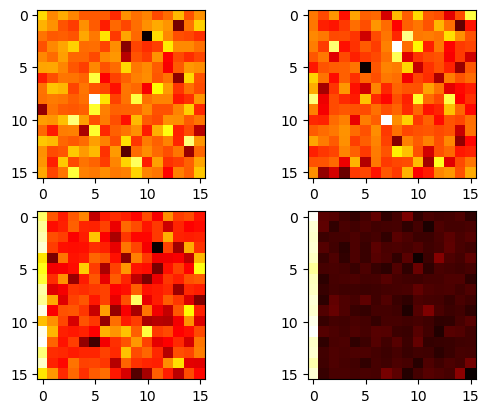

In [19]:


fig, axs = plt.subplots(2,2)
axs[0,0].imshow(LDPclient.release_LapU(0.5), cmap = 'hot', interpolation = 'nearest')
axs[0,1].imshow(LDPclient.release_LapU(1), cmap = 'hot', interpolation = 'nearest')
axs[1,0].imshow(LDPclient.release_LapU(10), cmap = 'hot', interpolation = 'nearest')
axs[1,1].imshow(LDPclient.release_LapU(100), cmap = 'hot', interpolation = 'nearest')

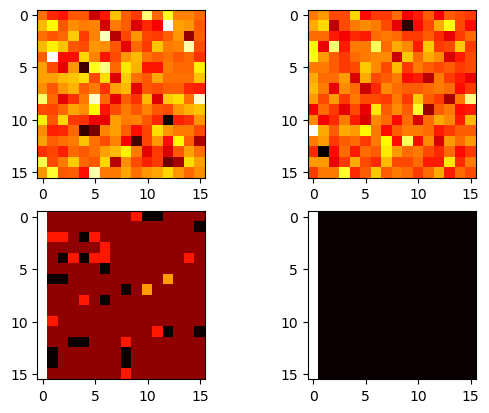

In [63]:
fig, axs = plt.subplots(2,2)
axs[0,0].imshow(LDPclient.release_DiscLapU(0.5), cmap = 'hot', interpolation = 'nearest')
axs[0,1].imshow(LDPclient.release_DiscLapU(1), cmap = 'hot', interpolation = 'nearest')
axs[1,0].imshow(LDPclient.release_DiscLapU(10), cmap = 'hot', interpolation = 'nearest')
axs[1,1].imshow(LDPclient.release_DiscLapU(100), cmap = 'hot', interpolation = 'nearest')

In [62]:
fig, axs = plt.subplots(2,2)
axs[0,0].imshow(LDPclient.release_genRR(0.5), cmap = 'hot', interpolation = 'nearest')
axs[0,1].imshow(LDPclient.release_DiscLapU(1), cmap = 'hot', interpolation = 'nearest')
axs[1,0].imshow(LDPclient.release_DiscLapU(10), cmap = 'hot', interpolation = 'nearest')
axs[1,1].imshow(LDPclient.release_DiscLapU(100), cmap = 'hot', interpolation = 'nearest')

tensor([[ 4.0000e+00,  2.6736e-07,  1.3380e-06, -2.4073e-07, -1.4153e-06,
         -6.0091e-07,  1.5218e-06,  2.7815e-09, -3.0392e-07, -1.5737e-06,
         -1.1376e-06,  7.0810e-07, -1.0906e-06,  2.1868e-08, -1.2933e-06,
         -1.0831e-06]])

tensor([ 4.0279e+00,  4.9548e-03, -7.0376e-03,  2.2084e-02,  1.9726e-02,
        -1.3334e-02, -4.7217e-04,  4.1203e-02, -2.4079e-02,  1.9621e-02,
        -2.0523e-02,  2.1427e-02, -2.2096e-02,  4.8715e-03,  1.0381e-02,
         2.1848e-02])

In [25]:
LDPclient.release_LapU(0.5).mean(axis=1)

IndexError: Dimension out of range (expected to be in range of [-2, 1], but got 2)

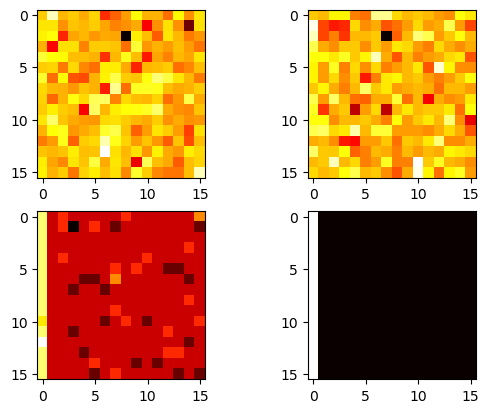

In [21]:
fig, axs = plt.subplots(2,2)
axs[0,0].imshow(LDPclient.release_DiscLapU(0.5), cmap = 'hot', interpolation = 'nearest')
axs[0,1].imshow(LDPclient.release_DiscLapU(1), cmap = 'hot', interpolation = 'nearest')
axs[1,0].imshow(LDPclient.release_DiscLapU(10), cmap = 'hot', interpolation = 'nearest')
axs[1,1].imshow(LDPclient.release_DiscLapU(100), cmap = 'hot', interpolation = 'nearest')



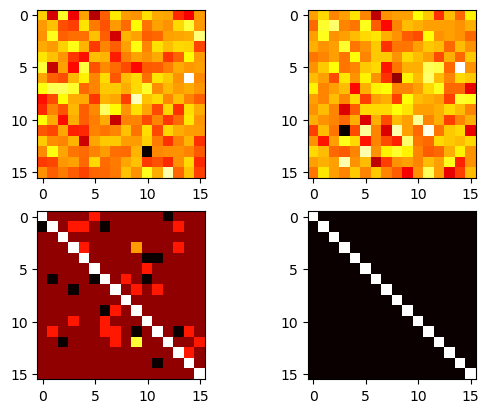

In [5]:
disclaputest = discLapU(device)
fig, axs = plt.subplots(2,2)
disclaputest.privatize(data_disc, n_category, 0.1)
axs[0,0].imshow(disclaputest.privatize(data_disc, n_category, 0.1), cmap = 'hot', interpolation = 'nearest')
axs[0,1].imshow(disclaputest.privatize(data_disc, n_category, 1.0), cmap = 'hot', interpolation = 'nearest')
axs[1,0].imshow(disclaputest.privatize(data_disc, n_category, 10), cmap = 'hot', interpolation = 'nearest')
axs[1,1].imshow(disclaputest.privatize(data_disc, n_category, 1000), cmap = 'hot', interpolation = 'nearest')

In [ ]:
data_onehot = self._transform_onehot(data_disc, n_category)


In [66]:
        data_onehot = self._transform_onehot(data_disc, n_category)
        one_matrix = torch.zeros(size = torch.Size([sample_size, alphabet_size])).add(1)
        bias = torch.tensor(privacy_level).exp()
        bias_matrix = data_onehot.mul(bias).add(one_matrix).sub(data_onehot)

        p = 1 / ( torch.tensor(privacy_level).exp().add(alphabet_size - 1) )
        p = torch.zeros(size = torch.Size([sample_size, alphabet_size])).add(1).mul(p)
        p = p.mul(bias_matrix)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [24]:
weights = torch.tensor([0, 10, 3, 0], dtype=torch.float) # create a tensor of weights
multi = torch.multinomial(weights, 2)
 return(torch.nn.functional.one_hot(data_multinomial, alphabet_size))

IndentationError: unexpected indent (2434617784.py, line 3)

In [69]:
data_disc

tensor([0, 0, 0,  ..., 0, 0, 0])

In [67]:
torch.nn.functional.one_hot(multi_sample, 4)

NameError: name 'multi_sample' is not defined

In [70]:
data_conti.view(-1)

tensor([0., 0., 0.,  ..., 0., 0., 0.])